In [1]:
import numpy as np
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from spectral_cube import SpectralCube as sc
import aplpy
import astropy.units as u
from jupyter_io import savefig_in_notebook
from astropy.wcs import WCS

In [2]:
hdu = fits.open('/home/amigos/r_yamada/ymdfits/W3_analy_shell.fits')[0]
cube = sc.read(hdu)
subcube = cube.spectral_slab(-55*u.km/u.s, -40*u.km/u.s)
subcube = subcube.with_spectral_unit(u.km/u.s)

mom = [subcube.moment(order=i) for i in range(3)]

hdu_mom = [mom[i].hdu for i in range(3)]

In [1]:
# f = plt.figure()
f = aplpy.FITSFigure(hdu_mom[1], subplot=(2,2,1))
f.show_colorscale(vmax=-35, vmin=-50, cmap='rainbow')
f.set_xaxis_coord_type('scalar')
f.set_yaxis_coord_type('scalar')
f.add_colorbar()
f.show_contour(levels=np.linspace(0,20,21)*40+20, colors='black')
f.add_scalebar(0.08999993250009113, '3 pc', color='black')
#              unit: arcmin
f.add_beam()
f.beam.set_color('black')
plt.tight_layout()

NameError: name 'aplpy' is not defined

In [2]:
savefig_in_notebook(f, 'test.pdf')

NameError: name 'savefig_in_notebook' is not defined

/home/amigos/.local/share/virtualenvs/python_tutorials-reEi3ZP5/lib/python3.7/site-packages/spectral_cube/_moments.py:169: RuntimeWarning: invalid value encountered in true_divide
  np.nansum(data, axis=axis))
/home/amigos/.local/share/virtualenvs/python_tutorials-reEi3ZP5/lib/python3.7/site-packages/aplpy/core.py:780: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("rainbow"))
  cm.set_bad(color)
/home/amigos/.local/share/virtualenvs/python_tutorials-reEi3ZP5/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:234: UserWarning: No contour levels were found within the data range.
  cset = super().contour(*args, **kwargs)


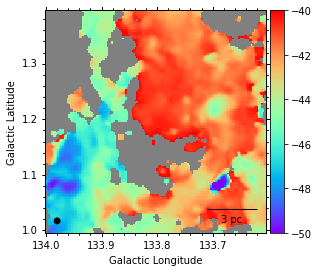

In [30]:
include_mask = subcube > 1.3*u.K
subcube_masked = subcube.with_mask(include_mask)

mom_m = subcube_masked.moment(order=1)

hdu_mom_m = mom_m.hdu
# f = plt.figure()
f = aplpy.FITSFigure(hdu_mom_m, subplot=(2,2,1))
f.show_colorscale(vmax=-40, vmin=-50, cmap='rainbow')
f.set_xaxis_coord_type('scalar')
f.set_yaxis_coord_type('scalar')
f.add_colorbar()
f.set_nan_color('#808080')
f.show_contour(levels=np.linspace(0,20,21)*40+20, colors='black')
f.add_scalebar(0.08999993250009113, '3 pc', color='black')
#              unit: arcmin
f.add_beam()
f.beam.set_color('black')

In [37]:
def my_world2pix(l, b, v):
    return WCS.wcs_world2pix(l, b, v, 0)

In [38]:
lmin, bmin, a = my_world2pix(133.6, 1.0, 0)

AttributeError: 'float' object has no attribute 'wcs'